# Supervised Machine Learning

## Name - Srikanth Gembali

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Loading the Data

In [2]:
data = pd.read_csv(r"C:\Users\admin\Downloads\student_scores.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Scatter plot

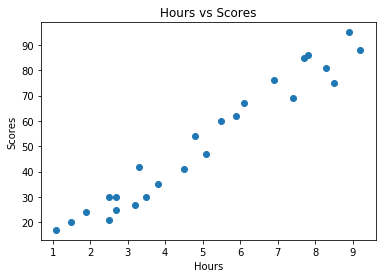

In [3]:
plt.scatter(data.Hours, data.Scores)
plt.title("Hours vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

## Splitting Data into Train and Test : Stratified Sampling

In [4]:
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [6]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(20, 1) (20,)
(5, 1) (5,)


## Hyperparameter tuning

In [7]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

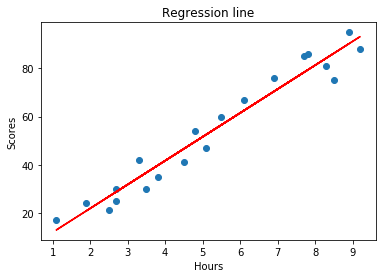

In [8]:
line = LR.coef_*X_train+LR.intercept_

plt.scatter(X_train,y_train)
plt.plot(X_train,line,color='red')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Regression line")
plt.show()

## Actual vs Predicted Scores

In [9]:
print(X_test)
y_pred = LR.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [10]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [11]:
hours = 9.25
Prediction_score = LR.predict([[hours]])
print("No of Hours = {}".format(hours))
print("predicted score for a student studying 9.25 hours/day = {} ".format(Prediction_score[0]))

No of Hours = 9.25
predicted score for a student studying 9.25 hours/day = 93.69173248737538 


## Evaluating the model

In [12]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
